# Plotting data from OMNIWeb Data


In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
%matplotlib inline
plt.style.use('seaborn')



In [3]:
#Extracting data from text file
data= np.loadtxt('omm.txt')
size= np.shape(data)
df = pd.read_csv("omm.txt",
                 delim_whitespace=True,
                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                 names=["Year", "DOY", "Hour", "B", "Bx", "By","Bz","Pd","Kp","Sp"])
df.head()

,Year,DOY,Hour,B,Bx,By,Bz,Pd,Kp,Sp
0,2017,244,0,3.7,-0.8,-2.3,-1.9,3.4,33,59
1,2017,244,1,4.0,-1.1,-1.5,-2.6,3.4,33,59
2,2017,244,2,5.1,-4.6,-1.3,-0.2,2.6,33,59
3,2017,244,3,6.1,-5.4,-0.2,1.0,3.3,33,59
4,2017,244,4,7.7,-6.6,3.1,1.6,3.5,33,59


In [4]:
#Change time 
df.index = pd.to_datetime(df["Year"] * 100000 + df["DOY"] * 100 + df["Hour"], format="%Y%j%H")
df = df.drop(columns=["Year", "DOY", "Hour"])
df.head()

,B,Bx,By,Bz,Pd,Kp,Sp
2017-09-01 00:00:00,3.7,-0.8,-2.3,-1.9,3.4,33,59
2017-09-01 01:00:00,4.0,-1.1,-1.5,-2.6,3.4,33,59
2017-09-01 02:00:00,5.1,-4.6,-1.3,-0.2,2.6,33,59
2017-09-01 03:00:00,6.1,-5.4,-0.2,1.0,3.3,33,59
2017-09-01 04:00:00,7.7,-6.6,3.1,1.6,3.5,33,59


# Generate Plots Directly from Data Frame

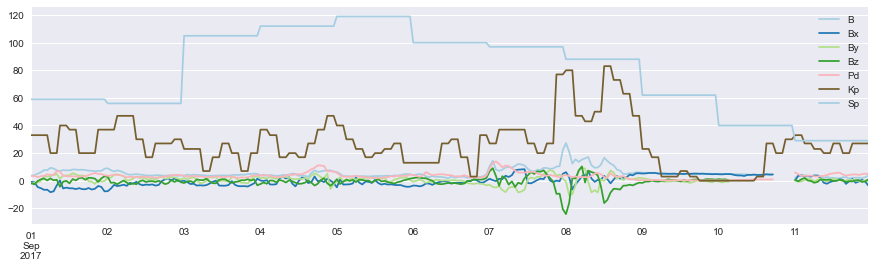

In [34]:
df.plot(figsize=(15,4),color =('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fbb4b9','#765F2E'))


## Generating Subplots for each Variable

Text(0, 0.5, 'Different Parameters')

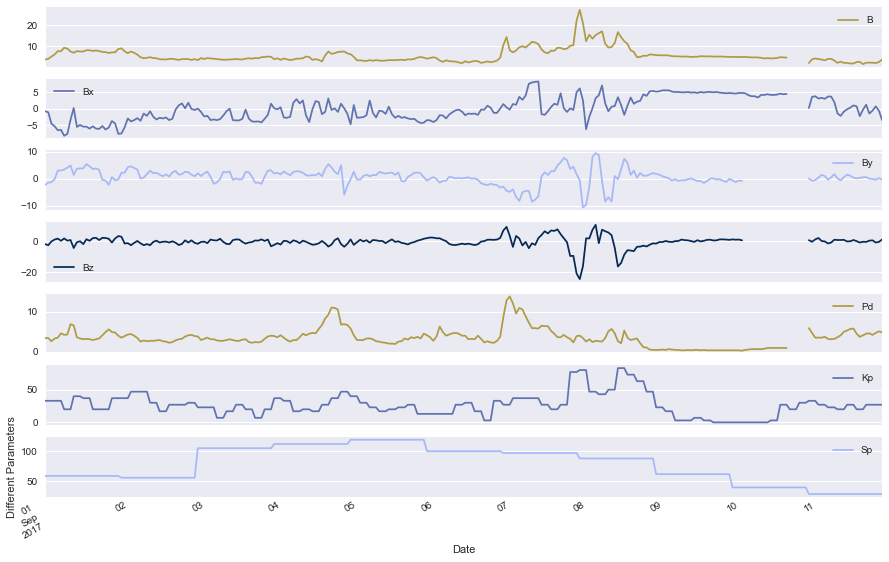

In [35]:
ax= df.plot(subplots=True, figsize=(15,10),color=('#AE9C45','#6073B1','#A7B8F8','#052955'))
plt.xlabel('Date')
plt.ylabel('Different Parameters')


## Alternative Way 

In [16]:
# Extracting Data from file.
B = data[:,3]   
Bx = data[:,4]
By = data[:,5]
Bz= data[:,6]
Pd = data[:,7] #Proton Density
Kp = data[:,8] #Kp Index*10
Sp= data[:,9]  #sunspot no


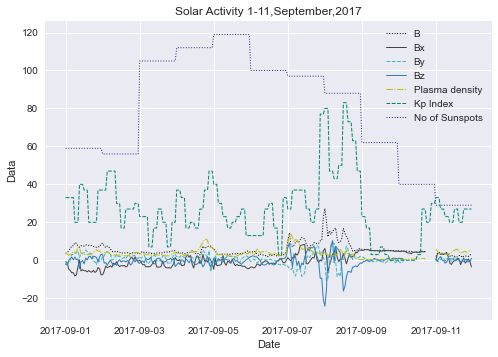

In [33]:
#Generating plots

plt.figsize=(20,20)

plt.plot(df.index,B,linestyle=':',linewidth = 1, color='k', label="B")
plt.plot(df.index,Bx,linestyle='-',linewidth = 1, color='#444444',label="Bx")
plt.plot(df.index,By,linestyle='--',linewidth = 1, color='#41b6c4',label="By")
plt.plot(df.index,Bz,linestyle='solid',linewidth = 1, color='#2c7fb8',label="Bz")
plt.plot(df.index,Pd,linestyle='dashdot',linewidth = 1, color='y',label="Plasma density")
plt.plot(df.index,Kp,linestyle='dashed',linewidth = 1, color='#018571',label="Kp Index")
plt.plot(df.index,Sp,linestyle='dotted',linewidth = 1, color='#253494',label="No of Sunspots")
plt.legend()

import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
plt.title('Solar Activity 1-11,September,2017')
plt.xlabel('Date')
plt.ylabel('Data')

#Saving the plot
plt.savefig("OP3.png",dpi=300)

## Plot the data creating subplots

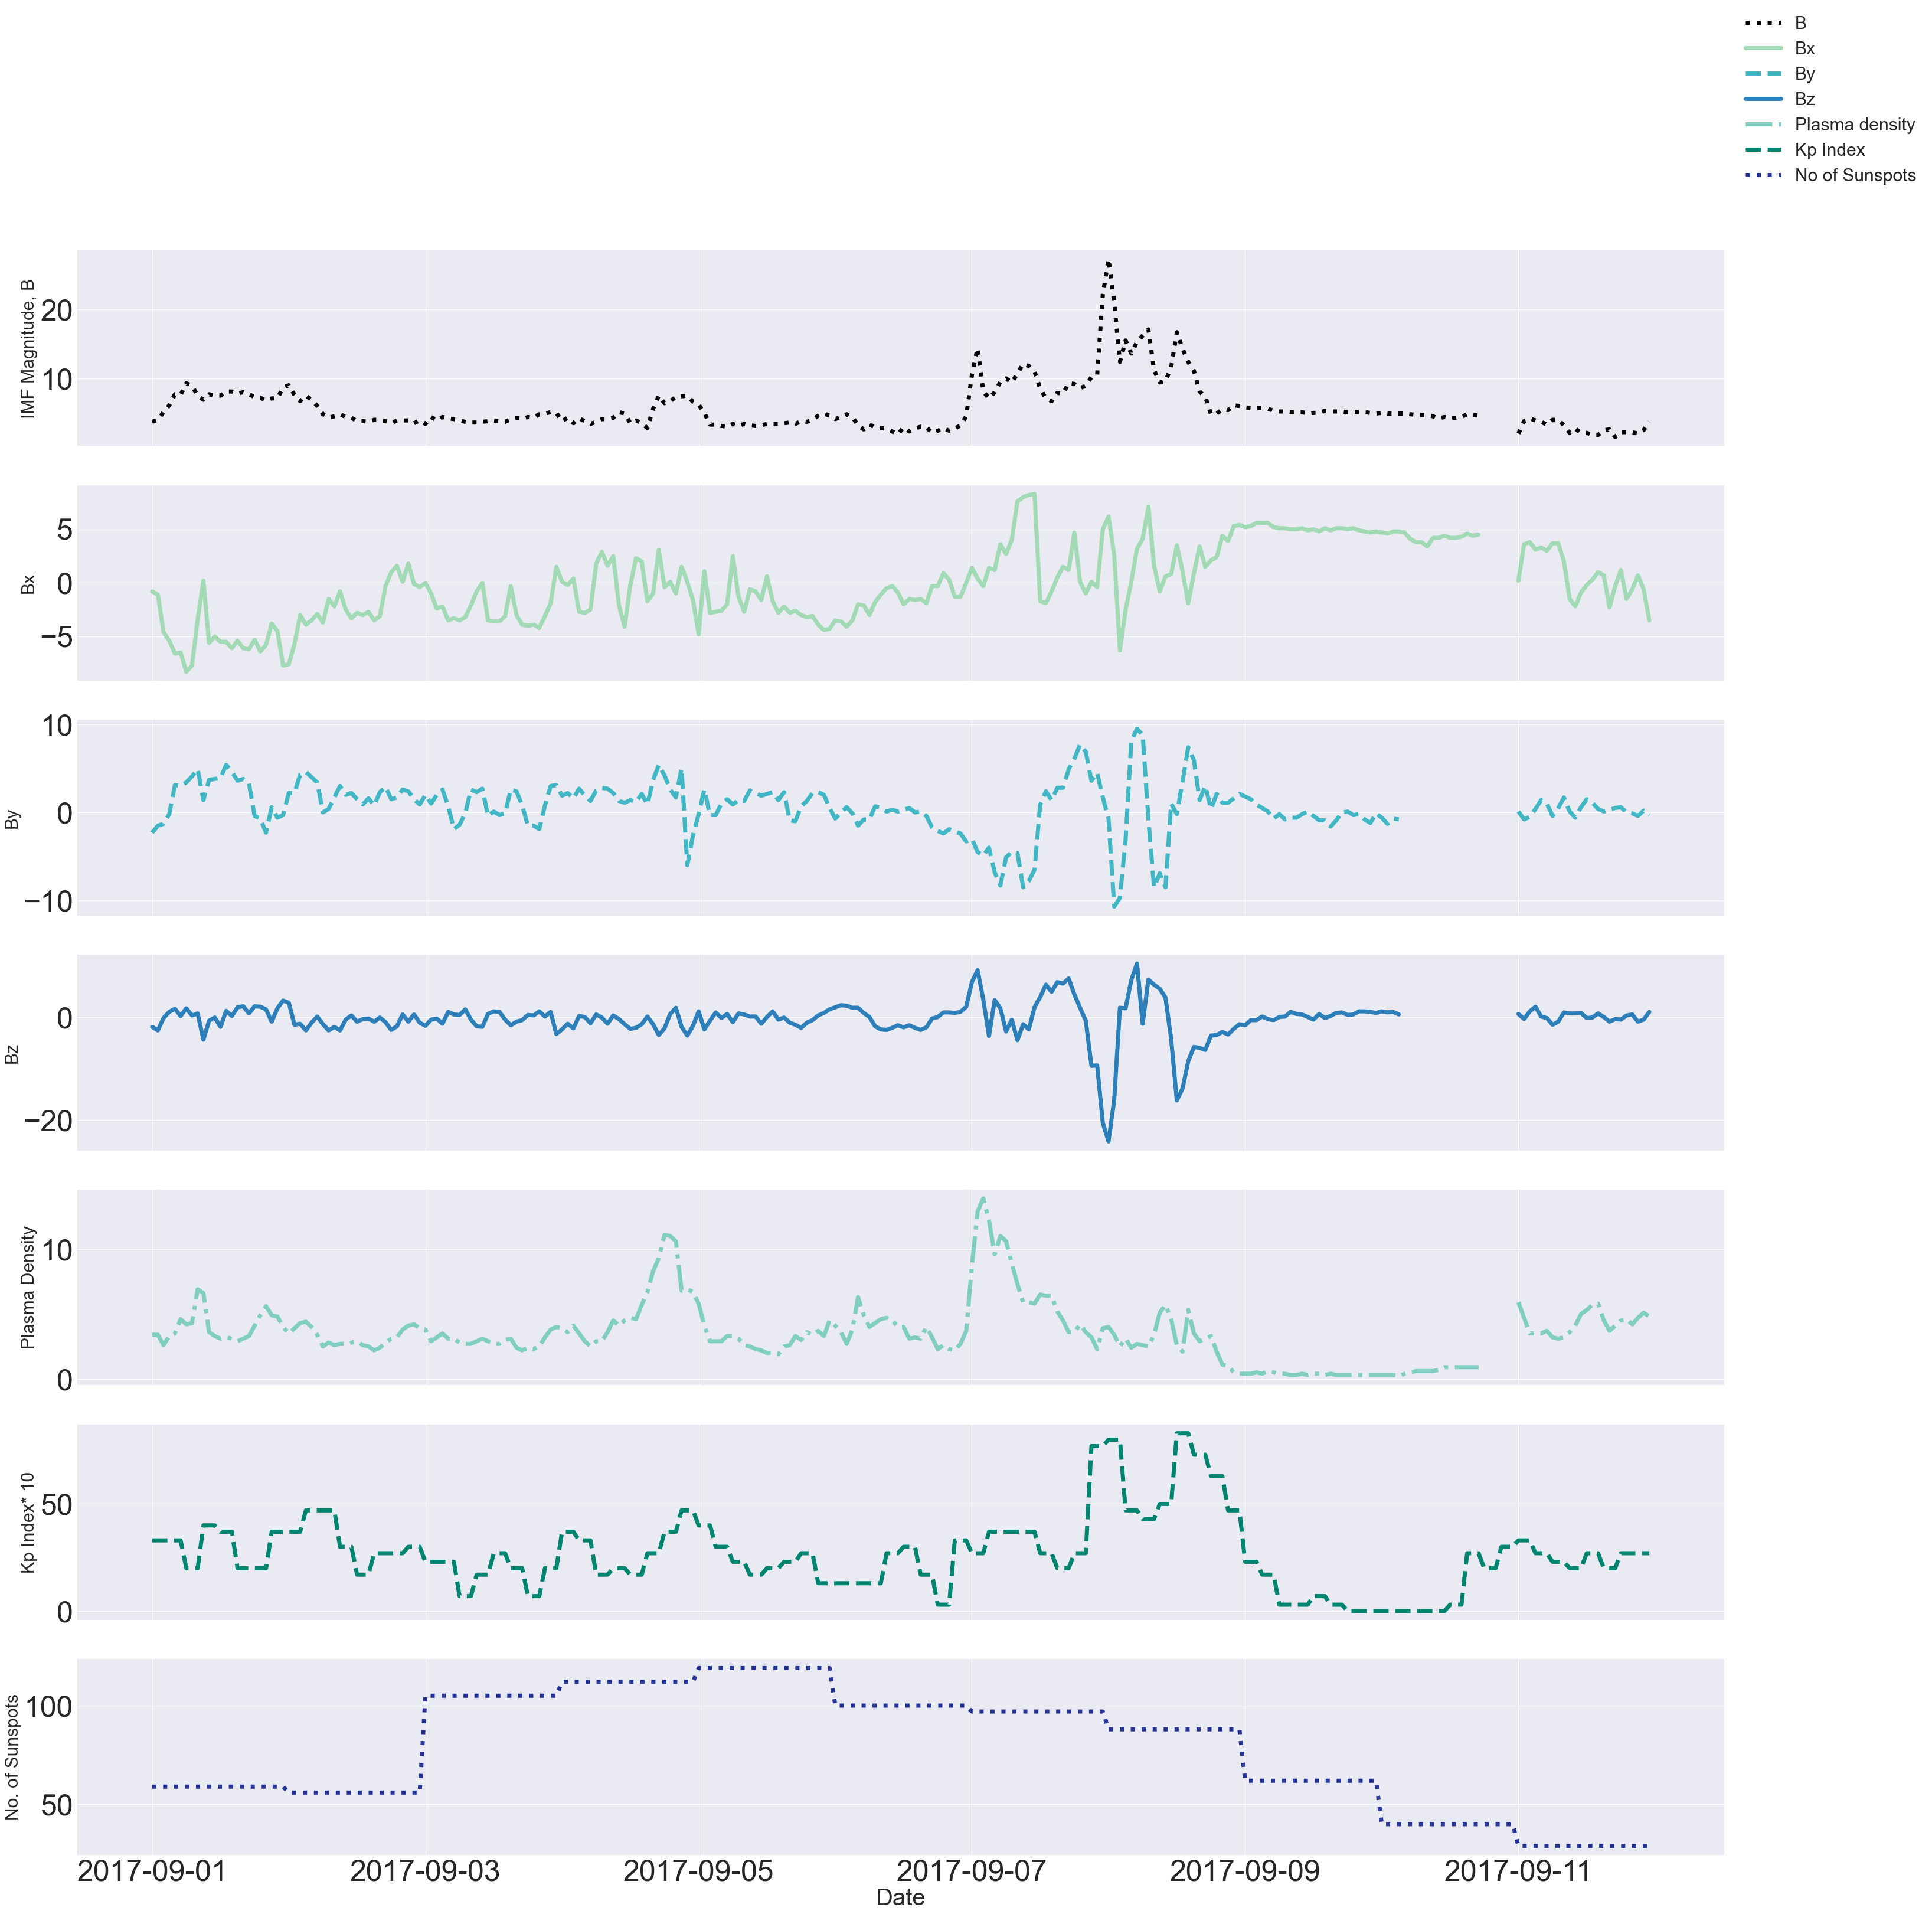

In [40]:
#Generating Subplots 
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(50,50), sharex=True)
ax1.plot(df.index,B,linestyle=':',linewidth = 7, color='k', label="B",)
ax2.plot(df.index,Bx,linestyle='-',linewidth = 7, color='#a1dab4',label="Bx")
ax3.plot(df.index,By,linestyle='--',linewidth = 7, color='#41b6c4',label="By")
ax4.plot(df.index,Bz,linestyle='solid',linewidth = 7, color='#2c7fb8',label="Bz")
ax5.plot(df.index,Pd,linestyle='dashdot',linewidth = 7, color='#80cdc1',label="Plasma density")
ax6.plot(df.index,Kp,linestyle='dashed',linewidth = 7, color='#018571',label="Kp Index")
ax7.plot(df.index,Sp,linestyle='dotted',linewidth = 7, color='#253494',label="No of Sunspots")


#Add legend
fig.legend(fontsize=30) # using a size in points

#Set X,Y axis label for each subplots
plt.xlabel('Date',fontsize=40)

ax1.set_ylabel('IMF Magnitude, B', fontsize= 30)
ax2.set_ylabel( 'Bx', fontsize= 30)
ax3.set_ylabel( 'By', fontsize= 30)
ax4.set_ylabel( 'Bz', fontsize= 30)
ax5.set_ylabel( 'Plasma Density', fontsize= 30)
ax6.set_ylabel( 'Kp Index* 10', fontsize= 30)
ax7.set_ylabel( 'No. of Sunspots', fontsize= 30)

import matplotlib 
matplotlib.rc('xtick', labelsize=50) 
matplotlib.rc('ytick', labelsize=50)

#Saving the plot
plt.savefig("OP.png",dpi=300)

